In [1]:
import os, sys
import numpy as np
from stl import mesh
import mpl_toolkits.mplot3d as a3
from matplotlib import pyplot
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

In [2]:
# Load the STL files and add the vectors to the plot
MESH_DIR = '/net/birdstore/Active_Atlas_Data/data_root/CSHL_meshes/atlasV7/aligned_instance_meshes'
VOL_DIR = '/net/birdstore/Active_Atlas_Data/data_root/CSHL_volumes'
scpath = os.path.join(MESH_DIR, '10.0um_SC_5.stl')
icpath = os.path.join(MESH_DIR, '10.0um_IC_5.stl')
sc_mesh = mesh.Mesh.from_file(scpath)
ic_mesh = mesh.Mesh.from_file(icpath)

In [ ]:
# Create a new plot
figure = pyplot.figure()
axes = a3(figure)
sc_mesh = mesh.Mesh.from_file(scpath)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(sc_mesh.vectors))
# Auto scale to the mesh size
scale = sc_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)
# Show the plot to the screen
pyplot.show()

In [ ]:
# this works but just mushes them together into one shape
cube = mesh.Mesh(np.concatenate([
    sc_mesh.data.copy(),
    ic_mesh.data.copy(),
]))

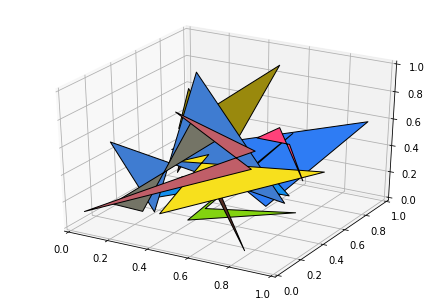

In [20]:
ax = a3.Axes3D(pl.figure())
for i in range(10):
    vtx = np.random.rand(4,3)
    tri = a3.art3d.Poly3DCollection([vtx])
    tri.set_color(colors.rgb2hex(np.random.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
pl.show()

In [ ]:
def combined_stl(meshes, save_path="./combined.stl"):
    combined = mesh.Mesh(np.concatenate([m.data for m in meshes]))
    combined.save(save_path, mode=stl.Mode.ASCII)
direc = "path_of_directory"
paths = [os.path.join(direc, i) for i in os.listdir(direc)]
meshes = [mesh.Mesh.from_file(path) for path in paths]
combined_stl(meshes)